In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Use matplotlib version: 3.3.4
# Use seaborn version: 0.11.1

In [3]:
df = pd.read_csv('medical_examination.csv')
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [4]:
# Add an overweight column to the data. To determine if a person is overweight, first calculate their BMI 
# by dividing their weight in kilograms by the square of their height in meters. If that value is > 25 
# then the person is overweight. Use the value 0 for NOT overweight and the value 1 for overweight.
df['overweight'] = (df['weight'] / (df['height'] / 100) ** 2).astype(int)

In [5]:
df.loc[df['overweight'] > 25,'overweight'] = 1
df.loc[df['overweight'] != 1, 'overweight'] = 0

In [6]:
# Normalize the data by making 0 always good and 1 always bad. If the value of cholesterol or gluc is 1, 
# make the value 0. If the value is more than 1, make the value 1.
df['cholesterol'].mask(df['cholesterol'] == 1,0,inplace=True)
df['gluc'].mask(df['gluc'] ==1,0,inplace=True)

df['cholesterol'].mask(df['cholesterol'] > 1,1,inplace=True)
df['gluc'].mask(df['gluc'] > 1,1,inplace=True)

In [7]:
# Convert the data into long format and create a chart that shows the value counts of the categorical 
# features using seaborn's catplot(). The dataset should be split by 'Cardio' so there is one chart for 
# each cardio value. The chart should look like examples/Figure_1.png.
#df_long = df.melt(id_vars='cardio', value_vars=['active','alco','cholesterol','gluc','overweight','smoke'])
df_cat = df.melt(id_vars= 'cardio', value_vars=['active','alco','cholesterol','gluc','overweight','smoke'])
df_cat

,cardio,variable,value
0,0,active,1
1,1,active,1
2,1,active,0
3,1,active,1
4,0,active,0
...,...,...,...
419995,0,smoke,1
419996,1,smoke,0
419997,1,smoke,0
419998,1,smoke,0


In [8]:
df_cat = (pd.DataFrame(df_cat.groupby(by=['cardio','variable','value'])['value'].count())).rename(columns={'value':'total'}).reset_index()
df_cat.head()

,cardio,variable,value,total
0,0,active,0,6378
1,0,active,1,28643
2,0,alco,0,33080
3,0,alco,1,1941
4,0,cholesterol,0,29330


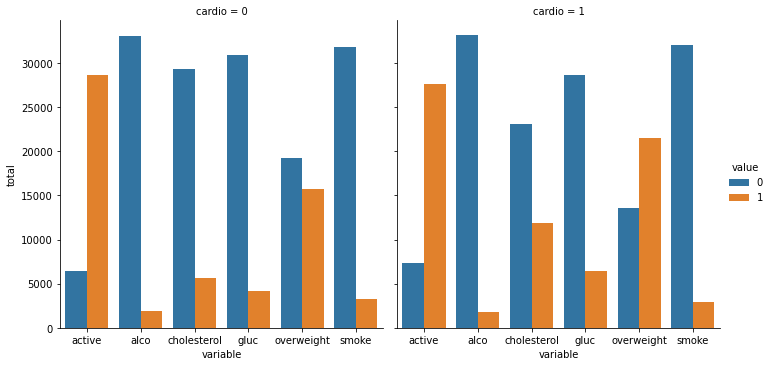

In [9]:
myplot = sns.catplot(x='variable',y='total',hue='value',kind='bar',col='cardio',data=df_cat)
fig = myplot.fig

In [10]:
'''
Clean the data. Filter out the following patient segments that represent incorrect data:

    diastolic pressure is higher than systolic (Keep the correct data with (df['ap_lo'] <= df['ap_hi']))
    height is less than the 2.5th percentile (Keep the correct data with (df['height'] >= df['height'].quantile(0.025)))
    height is more than the 97.5th percentile
    weight is less than the 2.5th percentile
    weight is more than the 97.5th percentile

'''
#df_cleaned = df.loc[df['ap_lo'] <= df['ap_hi']]
#df_cleaned = df_cleaned.loc[df_cleaned['height'] >= df_cleaned['height'].quantile(0.025)]
#df_cleaned = df_cleaned.loc[df_cleaned['height'] < df_cleaned['height'].quantile(0.975)]
#df_cleaned = df_cleaned.loc[df_cleaned['weight'] > df_cleaned['weight'].quantile(0.025)]
#df_cleaned = df_cleaned.loc[df_cleaned['weight'] < df_cleaned['weight'].quantile(0.975)]
df_heat = df[(df['ap_lo'] <= df['ap_hi'])
   & (df['height'] >= df['height'].quantile(0.025))
   & (df['height'] <= df['height'].quantile(0.975))
   & (df['weight'] >= df['weight'].quantile(0.025))
   & (df['weight'] <= df['weight'].quantile(0.975))
  ]
df_heat

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,1,0,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,1,0,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,0,0,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69993,99991,19699,1,172,70.0,130,90,0,0,0,0,1,1,0
69994,99992,21074,1,165,80.0,150,80,0,0,0,0,1,1,1
69995,99993,19240,2,168,76.0,120,80,0,0,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,0,1,0,0,0,1,1


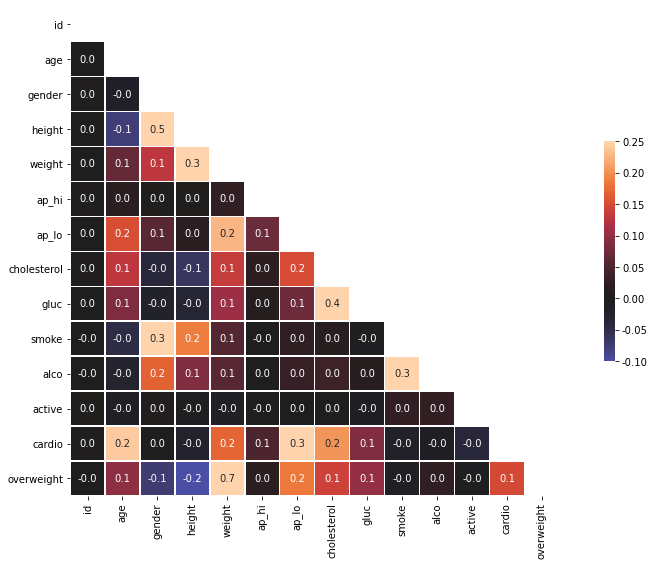

In [11]:
# Create a correlation matrix using the dataset. Plot the correlation matrix using seaborn's heatmap(). 
# Mask the upper triangle. The chart should look like examples/Figure_2.png.
corr = df_heat.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
fig,ax = plt.subplots(figsize=(16,9))
ax = sns.heatmap(corr,
            annot=True,
            mask=mask,
            linewidths=.5, 
            vmin=-0.1,
            vmax=0.25,
            center=0,
            fmt='.1f',
            square=True,
            cbar_kws={
            'shrink': .45,
            'format': '%.2f'}
           )